<a href="https://colab.research.google.com/github/BenxiaHu/DeepLearning/blob/main/pytorch_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# linear regression


Dependencies:
* torch: 0.1.11
* matplotlib

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [2]:
torch.manual_seed(1)    # reproducible

In [18]:
import torch
import math

dtype = torch.float
device = torch.device("cpu")
x1 = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
x2 = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
T = torch.stack((x1,x2),-1)
print(T)

y = torch.sin((x1+x2))
# y = a + b*x1 + c*x2 + d
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 0.01
while True:
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x1 + c * x2 + d

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if(loss.item() < 1e-6)

print(xx)

tensor([[-3.1416, -3.1416],
        [-3.1384, -3.1384],
        [-3.1353, -3.1353],
        ...,
        [ 3.1353,  3.1353],
        [ 3.1384,  3.1384],
        [ 3.1416,  3.1416]])


In [4]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [5]:
net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [6]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

In [7]:
plt.ion()   # something about plotting

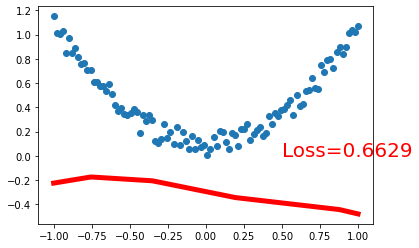

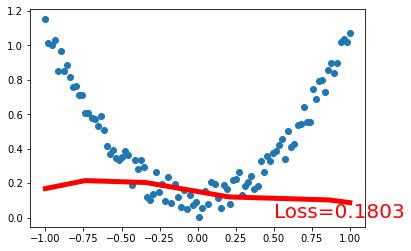

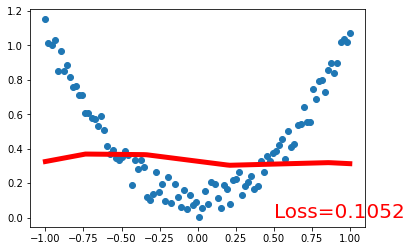

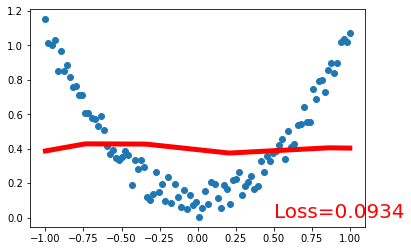

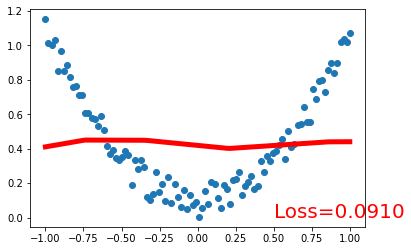

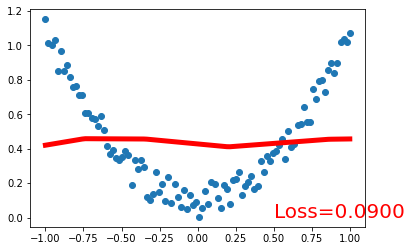

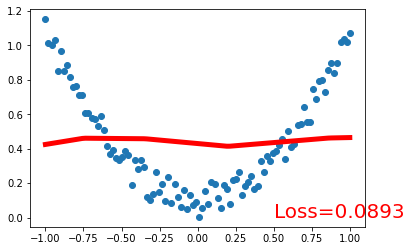

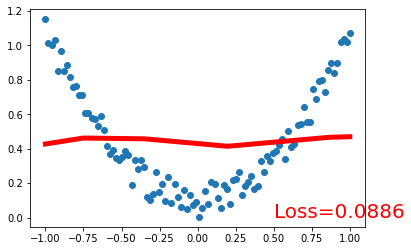

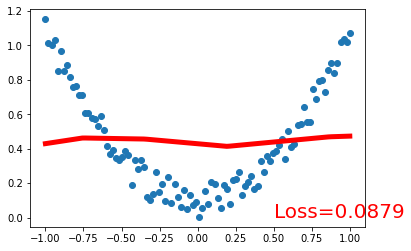

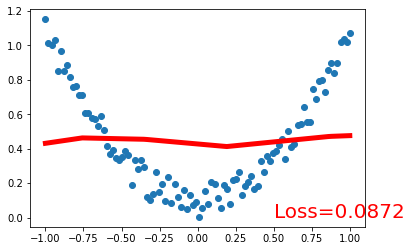

In [8]:
for t in range(100):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)

plt.ioff()
